In [1]:
import numpy as np
class Perceptron(object):
    """パーセプトロンの分度器
    
    パラメータ
    ----------
    eta: float
        学習率(0.0　より大きく1.0　以下の値)
    n_iter: int
        トレーニングデータのトレーニング回数
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ---------
    w_: １次元配列
        適合後の重み
    errors_: リスト
        各エポックでの誤分類（更新）の数
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """トレーニングデータに適合させる
        
        パラメータ
        ----------
        X: { 配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featuresは特徴量の個数
        y: 配列のようなデータ構造、shape = [n_samples]
            目的変数
        
        戻り値
        ---------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):  # トレーニング回数分トレーニングデータを反復
            errors = 0
            for xi, target in zip(X, y):  # 各サンプルで重みを更新
                # 重みの更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # 重みw0の更新
                self.w_[0] += update
                # 重みの更新が 0 でない場合は誤分類としてカウント
                errors += int(update != 0.0)
                
            # 反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """１ステップ後のクラスラベルを返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                               'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


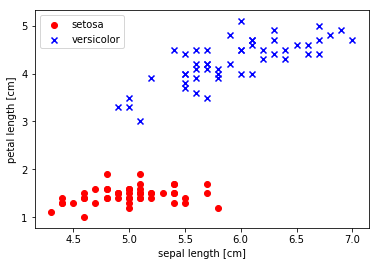

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# 1-100行目の目的変数を抽出
y = df.iloc[0:100, 4].values
# Iris-setosaを-1, Iris-virginicaを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の1,3列目の抽出
X = df.iloc[0:100, [0,2]].values
# 品種setosaのプロット（赤の○）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
# 品種versicolorのプロット（青の×）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

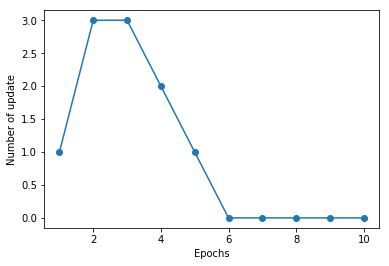

In [4]:
# パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1, n_iter=10)
# トレーニングのデータへのモデルの適合
ppn.fit(X, y)
# エポックと誤差分類関係の折れ線グラフをプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
# 図の表示
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                              np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                            y=X[y == cl, 1],
                            alpha = 0.8,
                            c = colors[idx],
                            marker = markers[idx],
                            label = cl,
                            edgecolor='black')

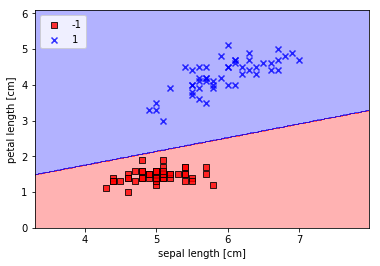

In [6]:
# 決定領域のプロット
plot_decision_regions(X, y, classifier=ppn)
# 軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.show()

In [12]:
class AdalineGD(object):
    """ ADAptive LInear NEuron 分類器
    
    パラメータ
    ----------
    eta: float
        学習率（0.0より大きく1.0以下の値）
    n_iter: int
        トレーニングデータの回数
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ----------
    w_: １次元配列
        適合後の重み
    cost_: リスト
        各エポックでの誤差平方和のコスト関数
        
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        ----------
        X: {配列のようなデータ構造}, shape = {n_samples, n_features}
            トレーニングデータ
            n_sampleはサンプルの個数、n_featureは特徴量の個数
        y: 配列のようなデータ構造、shape = [n_samples]
            目的変数
            
        戻り値
        ----------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):    # トレーニング回数分トレーニングデータを反復
            net_input = self.net_input(X)
            # activationメソッドは単なる恒等関数であるため、
            # このコードでは何の効果もないことに注意。代わりに、
            # 直接`output = self.net_input(X)`と記述することもできた。
            # activationメソッドの目的は、より概念的なものである。
            # つまり、（後ほど説明する）ロジスティック回帰の場合は、
            # ロジスティック回帰の分類器を実装するために
            # シグモイド関数に変更することもできる
            output = self.activation(net_input)
            # 誤差の計算
            errors = (y - output)
            # 重みの更新
            self.w_[1:] += self.eta * X.T.dot(errors)
            # 重みの更新
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 線形活性化関数の出力を計算 """
        return X
    
    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

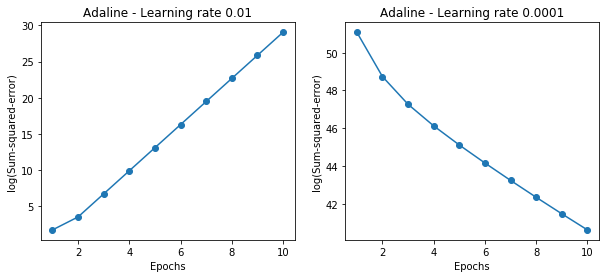

In [13]:
# 描画領域を１行２列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配降下法によるADALINEの学習（学習率 eta=0.01）
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベル設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
# 勾配降下法によるADALINEの学習（学習率 eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
# 図の表示
plt.show()

In [14]:
# データのコピー
X_std = np.copy(X)
# 各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

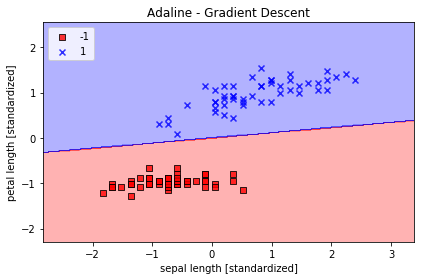

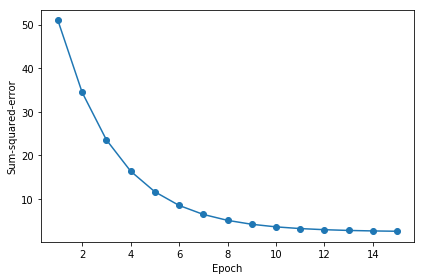

In [19]:
# 勾配降下法によるADALINEの学習（標準化後、学習率 eta=0.01）
ada = AdalineGD(n_iter=15, eta=0.01)
# モデルの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
# 図の表示
plt.tight_layout()
plt.show()
# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベル設定
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
# 図の表示
plt.tight_layout()
plt.show()

In [32]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron 分類器
    
    パラメータ
    ----------
    eta: float
        学習率（0.0より大きく1.0以下の値）
    n_iter: int
        トレーニングデータのトレーニング回数
    shuffle: bool（デフォルト：True）
        Trueの場合は、循環を回避するためにエポックごとにトレーニングデータをシャッフル
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ----------
    w_: １次元配列
        適合後の重み
    cost_: リスト
        各エポックですべてのトレーニングデータの平均を求める誤差平方和コスト関数
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # 学習率の初期化
        self.eta = eta
        # トレーニング回数の初期化
        self.n_iter = n_iter
        # 重みの初期化フラグはFalseに設定
        self.w_initialized = False
        # 各エポックでトレーニングデータをシャッフルするかどうかのフラグを初期化
        self.shuffle = shuffle
        # 乱数シードを設定
        self.random_state = random_state
        
    def fit(self, X, y):
        """ トレーニングデータに適合させる
        
        パラメータ
        ----------
        X: {配列のようなデータ構造}, shape = [n_samples, n_features]
            トレーニングデータ
            n_samplesはサンプルの個数、n_featureは特徴量の個数
        y: 配列のようなデータ構造、shape = [n_samples]
            目的変数
        
        戻り値
        ----------
        self: object
        
        """
        # 重みベクトルの生成
        self._initialize_weights(X.shape[1])
        # コストを格納するリストの生成
        self.cost_ = []
        # トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            # 指定された場合はトレーニングデータをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X,y)
            # 各サンプルのコストを格納するリストの生成
            cost = []
            # 各サンプルに対する計算
            for xi, target in zip(X, y):
                # 特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            # サンプルの平均コストを計算
            avg_cost = sum(cost)/len(y)
            # 平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなくトレーニングデータに適合させる"""
        # 初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_wegihts(X.shape[1])
        # 目的変数yの要素数が2以上の場合は
        # 各サンプルの特徴xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        # 目的変数yの要素数が1の場合は
        # サンプル全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """ トレーニングデータをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """ 重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ ADALINEの学習規則を用いて重みを更新"""
        # 活性化関数の出力を計算
        output = self.activation(self.net_input(xi))
        # 誤差の計算
        error = (target - output)
        # 重みの更新
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        # コストの計算
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """ 総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ 線形活性化関数の出力を計算"""
        return X
    
    def predict(self, X):
        """ 1ステップ後のクラスラベルを返す"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
        

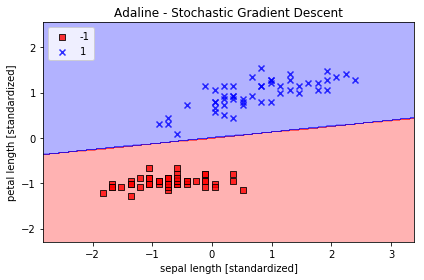

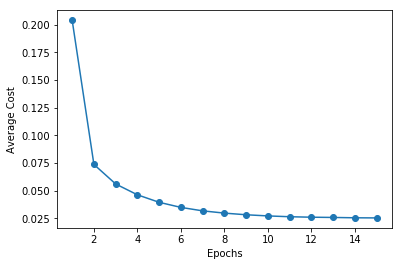

In [33]:
# 確率的勾配降下法によるADALINEの学習
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
# モデルへの適合
ada.fit(X_std, y)
# 境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada)
# タイトルの設定
plt.title('Adaline - Stochastic Gradient Descent')
# 軸のラベルの設定
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
# 凡例の設定（左上に配置）
plt.legend(loc='upper left')
plt.tight_layout()
# プロットの表示
plt.show()
# エポックとコストの折れ線グラフのプロット
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
# 軸のラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
# プロットの表示
plt.show()